# Lecture 6 Python Execution, Testing, Unit-Testing, IDEs, Debugging

## Python Execution

Впродовж курсу ми з вами користувалися здебільшого середовищем `jupyter`. Проте це середовище дуже нерелевантне до того, як працює пайтон код в умовному проді. Давайте розберемо цю тему детальніше, адже в найближчому часі вам буде необхідно створювати свої проекти відповідно до завдання, і створювати їх буде необхідно в умовах наближених до реальної роботи.

### Python Console

Якщо ви встановили собі `python` як пакет з офіційного сайту, або ви встановили його завдякі `anaconda`, то ви можете відкрити консоль, завдяки якій ви зможете виконувати той чи інший код. Для запуску консолі відрийте або unix-terminal, за умов якщо ваша os - unix-like, або promt від windows, або `anaconda powershell promt`, який був встановлений вами під час установки пакету `anaconda`

Далі - у випадку `unix` введить команду `python3`, або, у випадку windows - `python`

```
(base) PS > python
Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)] :: Anaconda, Inc. on win32
Type "help", "copyright", "credits" or "license" for more information.
>>>
```

Користучись консолью ви можете виконувати ті ж самі задачі, і той самий код що і в середі `jupyter`, консоль може бути дуже зручна у випадку коли вам необхідно швидко протестувати ту чи іншу конструкцію, чи працює вона взагалі і так далі

```
>>> a = 5
>>> b = c
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
NameError: name 'c' is not defined
>>> q = 10
>>> [i for i in enumerate(list(range(0, 20)) if i != a and i != q]
  File "<stdin>", line 1
    [i for i in enumerate(list(range(0, 20)) if i != a and i != q]
                                                                 ^
SyntaxError: closing parenthesis ']' does not match opening parenthesis '('
>>> [i for i in enumerate(list(range(0, 20))) if i != a and i != q]
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19)]
```

### Jupyter Environment

Середовище `jupyter` - яким ви користуєтеся доволі схоже за використанням консолі - проте моно може вміщати в себе `markdown` тексти, спрощувати роботу з масивами, табличними даними та зображенням. А код запускається не по одній інструкції як в консолі, а цілим скопом інструкцій, які були позначені в клітинці, що запустилася.

Приклад роботи середовища `jupyter` з графіками:

In [ ]:
# example data
x = np.arange(0.1, 4, 0.1)
y1 = np.exp(-1.0 * x)
y2 = np.exp(-0.5 * x)

# example variable error bar values
y1err = 0.1 + 0.1 * np.sqrt(x)
y2err = 0.1 + 0.1 * np.sqrt(x/2)


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 6))

ax0.set_title('all errorbars')
ax0.errorbar(x, y1, yerr=y1err)
ax0.errorbar(x, y2, yerr=y2err)

ax1.set_title('only every 6th errorbar')
ax1.errorbar(x, y1, yerr=y1err, errorevery=6)
ax1.errorbar(x, y2, yerr=y2err, errorevery=6)

ax2.set_title('second series shifted by 3')
ax2.errorbar(x, y1, yerr=y1err, errorevery=(0, 6))
ax2.errorbar(x, y2, yerr=y2err, errorevery=(3, 6))

fig.suptitle('Errorbar subsampling')

Приклад роботи `jupyter` з таблицями:

In [ ]:
import pandas as pd

df = pd.DataFrame({'num_legs': [2, 4, 8, 0],
                   'num_wings': [2, 0, 0, 0],
                   'num_specimen_seen': [10, 2, 1, 8]},
                  index=['falcon', 'dog', 'spider', 'fish'])

df

Приклад роботи `jupyter` з масивами:

In [ ]:
import numpy as np

eye = np.eye(5)
eye

Середовище `jupyter` - взагалі використоується для виконання тих чи інших проектів, пов'язаних з наукою, даними, і так далі, в деяких аспектах, `jupyter` схожий на інше програмне середовище - `matlab`, він так само має змогу швидко робити графіки, відтворяти масиви, і код якого, здебільшого має виконуватися інструкція за існтрукцією - тобто в процедурному стилі.

### .py Files, create & execute

Те, що ви почали своє знайомсто з `python` через середовище `jupyter`, насправді, трохи спростило вам життя. Але базовим прикладом роботи з `python` середовищем є насамперед створення та запуск файлів з розширенням `.py`, і запуск цих файлів.

Наприклад створемо `.py` файл з наступним кодом:

In [ ]:
import time
import sys

try:
    i = 0
    while True:
        print(f"This is my {i}th iteration, now Im going to sleep")
        time.sleep(1)
        i += 1
except KeyboardInterrupt:
    print("Endless cycle was interrupted")
    sys.exit(1)

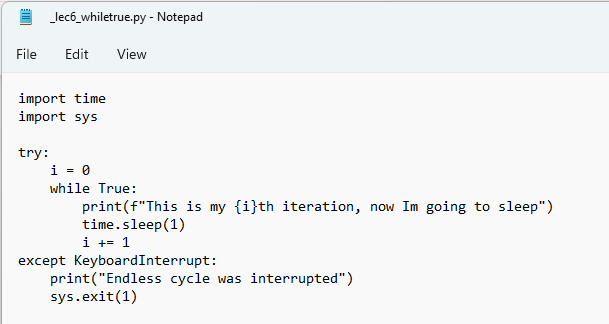

Як ви бачите, ми відкрили цей файл через `numpad` та зберігли його у форматі `.py`. Тепер нам треба запустити цей файл, користуючись наступним сінтаксисом (через термінал, як це було пояснено в главі про консолі)

* `cd /path/to/my_script/dir`
* `python _lec6_whiletrue.py`

Ви побачите наступне:

```
(base) PS O:\Projects\dnu_ftf_cs\_notebooks_data\_scripts> python .\_lec6_whiletrue.py
This is my 0th iteration, now Im going to sleep
This is my 1th iteration, now Im going to sleep
This is my 2th iteration, now Im going to sleep
This is my 3th iteration, now Im going to sleep
This is my 4th iteration, now Im going to sleep
This is my 5th iteration, now Im going to sleep
This is my 6th iteration, now Im going to sleep
Endless cycle was interrupted
```

Уявимо, наприклад, що ваша програма це умовний сервер, яка має працювати в безкінечному циклі і оброблювати запроси від програм-клієнтів. Тоді, вам, в першому наближенні буде необхідно розташувати свій пайтон файл на сервері, та запустити його таким самим чином. Щоб імплементувати базовий безкінечний цикл, достатньо звичайного `while True`.

Також, однією із опцій запуску пайтон файлів є запуск в інтерактивному режимі, давайте створимо новий файл, який буде мати якісь функції:

In [ ]:
import numpy as np

def get_mean(values: list):
    return np.mean(values)

def get_std(values: list):
    return np.std(values)

Тоді, при запуску цього файла, пайтон завантажить в пам'ять всі інструкції, що були надані йому в файлі, та відкриє ту ж саму консоль, проте ви вже зможете користуватися всіма об'єктами, що були виконані в файлі:

```
(base) PS O:\Projects\dnu_ftf_cs\_notebooks_data\_scripts> python -i .\lec6_interactive.py
>>> get_mean([1, 2, 3, 4, 5])
3.0
>>> get_std([1, 2, 3, 4, 5])
1.4142135623730951
```

## Testing

Коли ви створювати домашні завдання, ви користувались написаними функціями, ви, також, можливо, експерементували з даними, з поведінкою функцій при тому чи іншому стані вхідних даних і так далі. Це є тестуванням. Проте розділяють тестування **мануальне** та **автоматизоване**. Те, що робили ви до цих пір було **мануальним** тестуванням. Сфера тестінгу доволі обширна і вона не стосується теми цього курса, проте ви можете ознайомитися з цим питанням [детальніше](https://realpython.com/python-testing/).

В даній частині лекції ми будемо розбирати **мануальне** тестування - базову імплементацію, і деякі додаткові речі та бібліотекі.

Конкретно - ми будемо розбирати `unit-test`, це найменша з можливих складових тестування, так би мовити - базовий блок. Задача якого - не перевірити що програма працює **взагалі**, для цього існують більш об'ємні речі, проте задача юніт-теста - отримати маленьку частину програми, та перевірити, що вона працює так, як було визначено в технічному завданні.

Уявимо наступну сітуацію - вам необхідно розробити функцію, що рахує середнє значення виходячі з послідовності та повератає лише цілу частину від неї:

In [ ]:
def my_avg(sequence):
    return int(sum(sequence) / len(sequence))

Наче виглядає логічно.

Також, ми з вами вже дивились на конструкцію `assert`, яка перевіряє `bool` значення та підіймає `AssertionError` у випадку коли вираз, що перевіряється дорівнює `False`:

In [ ]:
data = [1, 2, 3, 4, 5]
assert my_avg(data) == 3

Інструкція виконалася, програма спрацювала без проблем, тепер давайте перевіримо її роботу на більшій кількості тест-кейсів, наприклад, створемо функцію `my_avg_test`, яка буде отримувати в якості аргумента функцію, в якості другого - дані, а в якості третього - результат:

In [ ]:
test_data = [
    [1, 2, 3, 5], 
    [2, 3, 4, 5], 
    [1], 
    [0], 
    [], 
]

test_expected = [2, 3, 1, 0, 0]

def my_avg_test(fn, data, ys):
    for (example, y) in zip(data, ys):
        assert fn(example) == y, f"Error with data {example}, expected result {ys}"

In [ ]:
my_avg_test(my_avg, test_data, test_expected)

Отримаили `ZeroDivisionError`, тому що `len([]) = 0`, тепер ми знаємо що до нашої функції необхідно додати умову, що якщо довжина `sequence == 0`, необхідно повернути `0`

In [ ]:
def my_avg(sequence):
    
    if len(sequence) == 0:
        return 0
    else:
        return int(sum(sequence) / len(sequence))

In [ ]:
def my_avg_test(fn, data, ys):
    for (example, y) in zip(data, ys):
        assert fn(example) == y, f"Error with data {example}, expected result {ys}"

In [ ]:
my_avg_test(my_avg, test_data, test_expected)

Як ви бачите, все пройшо так, я ми того і очікували, проте якби ми не виявили помилку з `ZeroDiv`, можливо, це б призвело до наслідків в роботі програми, сервера, системи, тощо, детальніше про необхідність тестування, та чому це може призвести до страшних наслідків можна прочитати тут [Therac-25](https://en.wikipedia.org/wiki/Therac-25)

### python unittest lib

Однак звичайними `assert`, зазвичай, проблему тестування не вирішити - необхідні більш детальні тест-кейси, писати які буде зручно, а функціонал буде під капотом. Для цього існують спеціальні бібліотеки \ фреймворки для тестування:
* nose / nose2
* unittest

Оскількі `unittest` - є бібліотекою за замовченням, трохи розберемо її сінтаксіс і роботу з тестами на реальному прикладі:

Давайте візьмемо задачу з імплементацією `DoublyLinkedList` з попереднього завдання, та протестуємо його за допомогою бібліотеки `unittest`.

*В цьому завданні, вам необхідно створити структуру DoublyLinkedList, яка має вміщати, відповідно, DoublyNode. Проте методи цього ліста будуть відічатися. Цей ліст має імплементувати методи, які були перечислені в другому завданні, тобто __len__, __str__, __iter__ та __next__, але, ще одним додатковим атрібутом цього ліста має стати direction, так, якщо l_list: DoublyLinkedList і l_list.direction = True, це значить, що всі методи мають працювати як зі звичайним LinkedList, тобто перечислювати ноди в прямому порядку. Якщо l_list.direction = False, порядок має змінюватись.*

Перед імплементацією - давайте спочатку створемо тест-кейси, щоб наша програма відповідала всім вимогам завдання, та подивимося на сінтаксіс цієї бібліотеки:

Давайте помістимо цей код в окремий файл `dobly_node.py` а поки роздивимось сінтаксіс бібліотеки `unittest`:

З базового прикладу документації вказан наступний сінтаксіс:

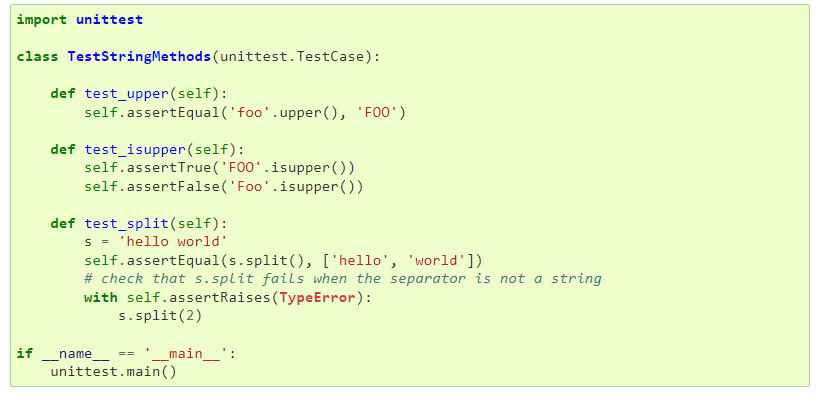

Ми бачимо, що об'єкт тесту має наслідуватися від `unittest.TestCase`, також, ми можемо бачити, що базовий клас, від якого ми успадковуємся імплементує методи, завдяки якім ми можемо відтворювати тести, наприклад `assertEqual`, `assertTrue` і т.д.

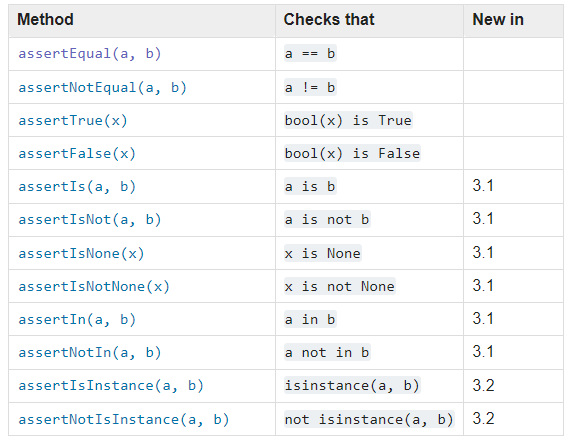

Щож, тоді давайте послідовно пройдемося по завданню, які є основні пункти:
* Імплементація ініту інстанса - наш лінкед ліст має отримувати послідовність, перетворювати її на ноди, тримати в якості атрібутів `head` та `tail`, а також напрямок ітерації завдяки атрібуту `direction`.
* Імплементація `len`
* Імплементація `str`
* Імплементація `iter`

Тоді, виходить що по кожному завданню можна створити метод тест-кейсу, який буде перевіряти кожну відповідну задачу, почнемо з `__init__`:

In [ ]:
import unittest

class TestDoublyLList(unittest.TestCase):
    
    def test_init(self):
        pass
    
    def test_len(self):
        pass
    
    def test_str(self):
        pass
    
    def test_iter(self):
        pass

Таким чином ми задали заготовки під наші тест-кейси, тепер їх треба заповнити, відповідно до імплементації, яку ми запланували:

In [ ]:
# lets create a class name to refere to

class DoublyLinkedList:
    pass

class DoublyNode:
    pass

In [ ]:
class TestDoublyLList(unittest.TestCase):

    def test_init(self):
        seq = "abcd"
        dl_list = DoublyLinkedList(seq)

        # values
        self.assertTrue(dl_list.head.data == "a")
        self.assertTrue(dl_list.tail.data == "d")
        self.assertTrue(dl_list.head.next.data == "b")
        self.assertTrue(dl_list.tail.prev.data == "c")

        # links
        self.assertIsInstance(dl_list.head, DoublyNode)
        self.assertIsInstance(dl_list.tail, DoublyNode)

        self.assertIsInstance(dl_list.head.prev, type(None))
        self.assertIsInstance(dl_list.tail.next, type(None))

        self.assertIsInstance(dl_list.head.next, DoublyNode)
        self.assertIsInstance(dl_list.head.prev, DoublyNode)

        # et cetera et cetera
        # seq = [1, 2, 3, 4, 5]
        # seq = []

    def test_len(self):

        seq = [1, 2, 3, 4, 5]
        dl_list = DoublyLinkedList(seq)

        self.assertEqual(len(seq), len(dl_list))

    def test_str(self):

        seq = [1, 2, 3]
        dl_list = DoublyLinkedList(seq)

        # forward
        dl_list.direction = True
        expected_str = f"(1) -> (2) -> (3)"
        self.assertEqual(str(dl_list), expected_str)

        # inverse
        dl_list.direction = False
        expected_str = f"(3) -> (2) -> (1)"
        self.assertEqual(str(dl_list), expected_str)

    def test_iter(self):

        seq = ("hi", "there", "im", "a", "node")
        dl_list = DoublyLinkedList(seq)
        dl_list.direction = True

        for index, node in enumerate(dl_list):
            self.assertIsInstance(node, DoublyNode)
            self.assertEqual(node.data, seq[index])

        dl_list.direction = False
        seq = tuple(reversed(seq))

        for index, node in enumerate(dl_list):
            self.assertIsInstance(node, DoublyNode)
            self.assertEqual(node.data, seq[index])

Тепер давайте перенесемо код нашого дабл лінкед ліст до окремого файла, як і код тесту.

Запуск тестів, як і будь якого `.py` файлу - `python(3) _lec6_testlist.py`

```
(base) PS O:\Projects\dnu_ftf_cs\_notebooks_data\_scripts> python .\_lec6_testlist.py
....
----------------------------------------------------------------------
Ran 4 tests in 0.000s

OK
```

Окей, з сінтаксисом наче зрозуміло, проте хотілося-б розповісти про необхідність тестів взагалі. Насамперед, тести потрібні для потенційної **модифікації** коду. Тобто, на якомусь етапі проекта у вас імплементован той чи інший модуль, і до нього написані тести. Цей модуль інтегрований в умовний інший модуль і там використовується. І ви хочете додати доп функціонал, або переробити модуль, тоді - ви можете переробити його, а перевірка на функціонал вже імплементована.

Також, дуже корисною і поважною вважається методологія програмування - `TDD`, `Test-Driven-Development` - це коли до імплементації модуля, програми, тощо, розробник вже прогнозує як має поводити себе програма, та починає розробку саме з тестів, і тількі потім - програми.

## IDEs

Написання коду користуючись тексовими редакторами, або середовищем `jupyter` звичайно, можливе, проте для покращення умов праці, вже давно існують програми для написання коду (для різних мов програмування) які називаються **Integrated Development Environment**, або **IDE**. 

Зазвичай, це спеціальні програми, які підтримують наступний функціонал:

* Редактор, розроблений спеціально для підтримки коду (підкреслення помилок, автокоррекція, кольоровий текст синтаксису)
* Інструменти білда, виконання та дебагу
* Підтримка плагінів
* Підтримка контролю версій (git)

IDE, здебільшого, умовна можно розділити на легкі (які не додають багато функціоналу) та важкі. 
Прикладами "легких" IDE для пайтону:
* Atom
* Sublime Text
* Vi / Vim
* Python IDE

Прикладами "важких" IDE є:
* PyCharm
* VsCode
* Spyder

Вибір IDE який вам подобається це діло вкуса, особисто я користуюся `VsCode` для ноутбуків (`.ipynb`) та `PyCharm` для розробки. У пайчарм є безкоштомна комьюніті едішн версія, яка є безкоштовною, почати можна з неї.

## Debugging

Перейдемо в `PyCharm`